### Consumer Complaint Resolution!!!

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

#### Tasks to be performed:

#### 1. Read the Data from the Given excel file.

In [3]:
#Training data!!

df_train = pd.read_csv(r"C:\Users\sujee\Downloads\Consumer_Complaints_train.csv")
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [4]:
#Testing data!!

df_test = pd.read_csv(r"C:\Users\sujee\Downloads\Consumer_Complaints_test.csv")
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


#### 2. Check the data type for both data (test file and train file)

In [5]:
#Training data!!

df_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
df_train.shape

(358810, 18)

In [7]:
#Testing data!!

df_test.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [8]:
df_test.shape

(119606, 17)

#### 3. Do missing value analysis and drop columns where more than 25% of data are missing 

In [9]:
#Training data!!

df_train.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [10]:
df_train = df_train.dropna(thresh=len(df_train) * (1 - 0.25), axis=1)

In [11]:
df_train.isnull().sum()

Date received                      0
Product                            0
Issue                              0
Company                            0
State                           2903
ZIP code                        2911
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
Complaint ID                       0
dtype: int64

In [12]:
#Testing data!!

df_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [13]:
df_test = df_test.dropna(thresh=len(df_test) * (1 - 0.25), axis=1)

In [14]:
df_test.isnull().sum()

Date received                     0
Product                           0
Issue                             0
Company                           0
State                           936
ZIP code                        937
Submitted via                     0
Date sent to company              0
Company response to consumer      0
Timely response?                  0
Complaint ID                      0
dtype: int64

#### 4. Extracting Day, Month,and Year from Date Received Column and create new fields for a month, year, and day 

In [15]:
for df in [df_train, df_test]:
    df['Date received'] = pd.to_datetime(df['Date received'])
    df['Day'] = df['Date received'].dt.day
    df['Month'] = df['Date received'].dt.month
    df['Year'] = df['Date received'].dt.year

#### 5. Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held"

In [16]:
cur_date = pd.to_datetime('now')
cur_date

C:\Users\sujee\AppData\Local\Temp\ipykernel_8596\241831322.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  cur_date = pd.to_datetime('now')


Timestamp('2024-02-02 15:56:38.977399')

In [17]:
for df in [df_train, df_test]:
    df['Days held'] = (cur_date - df['Date received']).dt.days
    df.loc[df['Days held'] < 0, 'Days held'] = 0  # Convert negative days held to zero

#### 6. Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" field.

In [18]:
for df in [df_train, df_test]:
    df.drop(['Date received','Date sent to company','ZIP code','Complaint ID'], axis=1, inplace=True)

In [19]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,3033
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,3204
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,3696
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,2892
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,3290


In [20]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,3303
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,2781
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,3073
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,2817
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,2766


#### 7. Imputing Nullvalue in “State”by Mode

In [21]:
for df in [df_train, df_test]:
    state_mode = df['State'].mode()[0]
    df.State.fillna(state_mode, inplace=True)

In [22]:
df.State.isnull().sum()

0

#### 8. With the help of the days we calculated above, create a newfield 'Week_Received' where we calculate the week based on the day of receiving.

In [23]:
for df in [df_train, df_test]:
    df['Week_Received'] = df['Days held']//7+1

In [24]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,3033,434
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,3204,458
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,3696,529
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,2892,414
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,3290,471


In [25]:
col = df_train['Consumer disputed?']

In [26]:
df_train.pop('Consumer disputed?')

0          No
1         Yes
2          No
3          No
4         Yes
         ... 
358805     No
358806     No
358807    Yes
358808     No
358809     No
Name: Consumer disputed?, Length: 358810, dtype: object

In [27]:
df_train['Consumer disputed?']=col

In [28]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,14,10,2015,3033,434,No
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,26,4,2015,3204,458,Yes
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,20,12,2013,3696,529,No
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,3,2016,2892,414,No
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,30,1,2015,3290,471,Yes


In [29]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,3303,472
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,2781,398
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,3073,440
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,2817,403
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,2766,396


#### 9. Store data of disputed people into the “disputed_cons” variable for future tasks.

In [30]:
df_train['Consumer disputed?'].replace({'Yes':True,'No':False}, inplace=True)

In [31]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,14,10,2015,3033,434,False
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,26,4,2015,3204,458,True
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,20,12,2013,3696,529,False
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,3,3,2016,2892,414,False
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,30,1,2015,3290,471,True


In [32]:
df_train.dtypes

Product                         object
Issue                           object
Company                         object
State                           object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Day                              int64
Month                            int64
Year                             int64
Days held                        int64
Week_Received                    int64
Consumer disputed?                bool
dtype: object

In [33]:
disputed_cons = df_train[df_train['Consumer disputed?']]
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week_Received,Consumer disputed?
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,26,4,2015,3204,458,True
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,30,1,2015,3290,471,True
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,10,1,2014,3675,526,True
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,7,12,2015,2979,426,True
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,5,4,2012,4320,618,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,CA,Postal mail,Closed with explanation,Yes,30,5,2014,3535,506,True
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,12,8,2013,3826,547,True
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,20,6,2016,2783,398,True
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,26,2,2013,3993,571,True


#### 10. Plot bar graph of the total no of disputes of consumers with the help of seaborn.

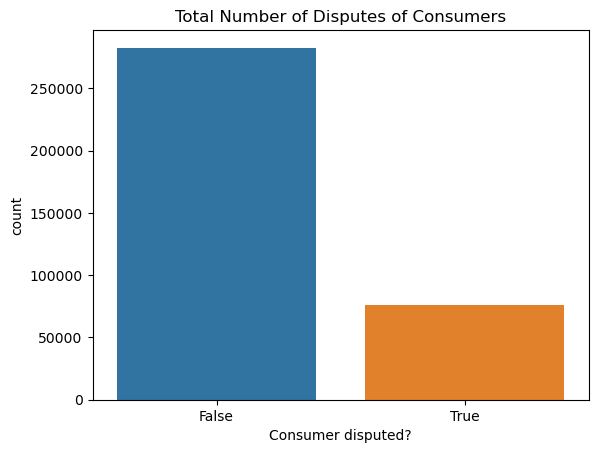

In [34]:
sns.countplot(x='Consumer disputed?', data=df_train)
plt.title('Total Number of Disputes of Consumers')
plt.show()

#### 11. Plot bar graph of the total no of disputes products-wise with the help of seaborn.

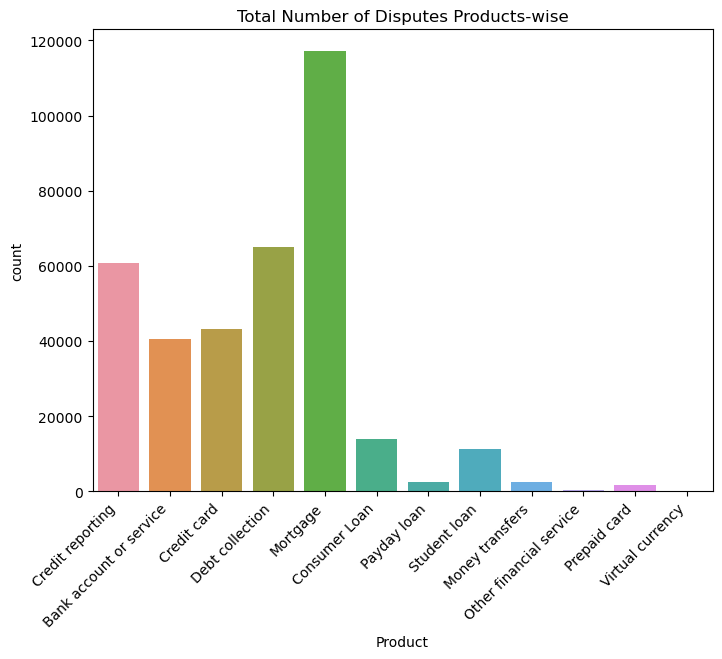

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Product', data=df_train)
plt.title('Total Number of Disputes Products-wise')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 12. Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn.

In [36]:
top_issues = df_train['Issue'].value_counts()
top_issues

Loan modification,collection,foreclosure    60185
Incorrect information on credit report      43825
Loan servicing, payments, escrow account    38456
Cont'd attempts collect debt not owed       27266
Account opening, closing, or management     17557
                                            ...  
Lost or stolen check                           14
Incorrect exchange rate                        12
Lender damaged or destroyed vehicle             3
Lender sold the property                        2
Lender damaged or destroyed property            1
Name: Issue, Length: 95, dtype: int64

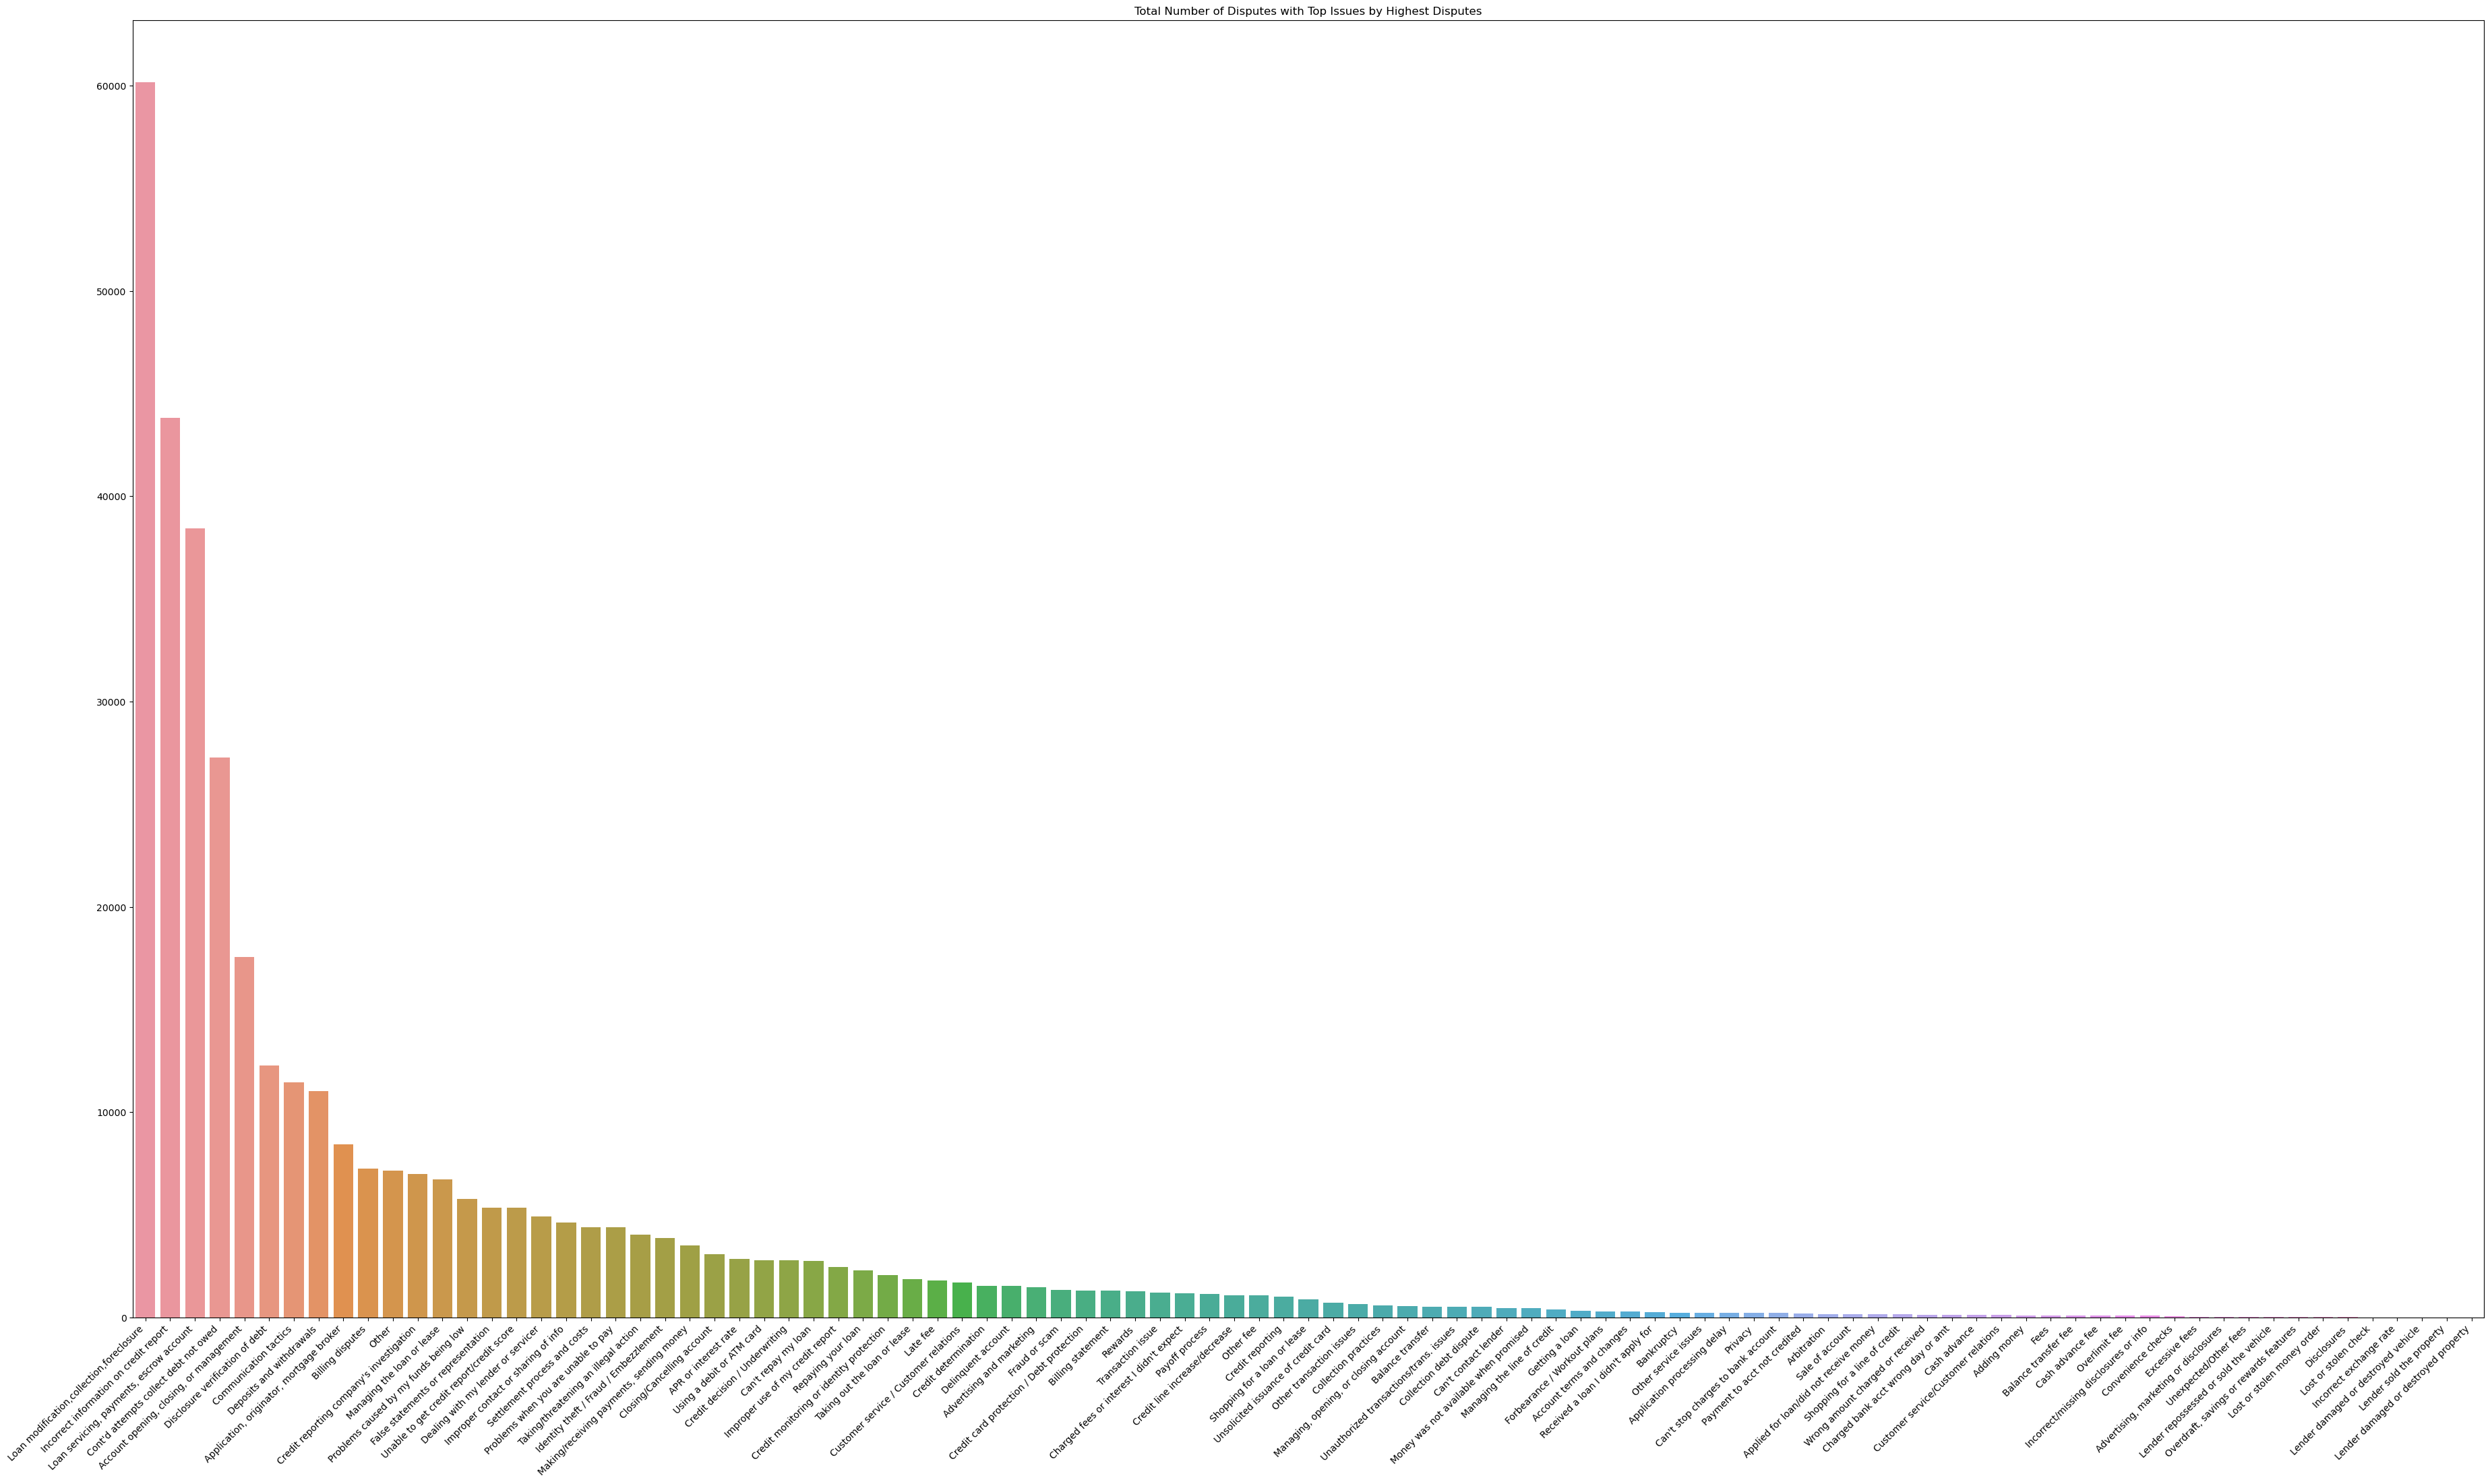

In [37]:
plt.figure(figsize=(45, 25))
sns.barplot(x=top_issues.index, y=top_issues.values)
plt.title('Total Number of Disputes with Top Issues by Highest Disputes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 13. Plot bar graph of the total no of disputes by State with Maximum Dispute.

In [38]:
state_disputes = df_train['State'].value_counts().head(10)
state_disputes

CA    55271
FL    34567
TX    26683
NY    24554
GA    15886
NJ    14571
PA    12834
IL    12745
VA    11645
MD    11456
Name: State, dtype: int64

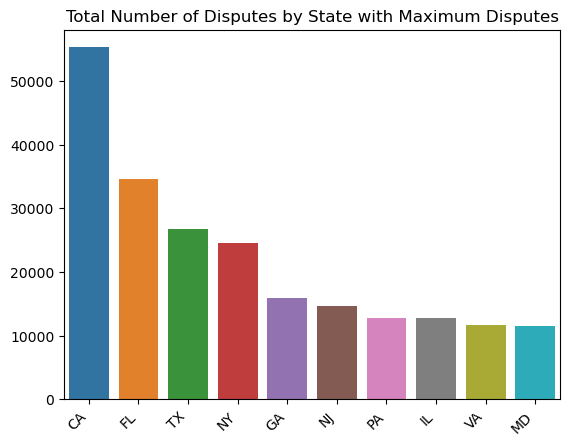

In [39]:
sns.barplot(x=state_disputes.index, y=state_disputes.values)
plt.title('Total Number of Disputes by State with Maximum Disputes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 14. Plot bar graph of the total no of disputes submitted via different source

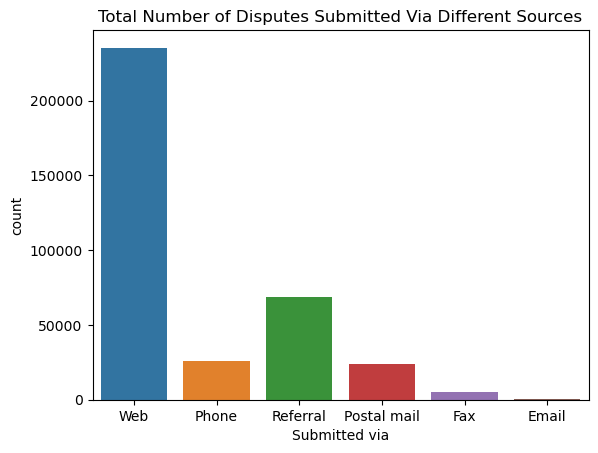

In [40]:
sns.countplot(x='Submitted via', data=df_train)
plt.title('Total Number of Disputes Submitted Via Different Sources')
plt.show()

#### 15. Plot bar graph of the total no of disputes where the Company's Response to the Complaints.

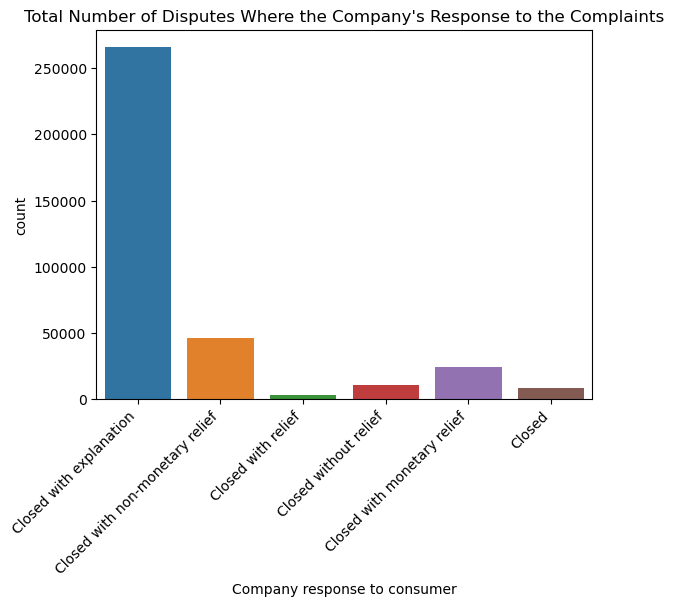

In [41]:
sns.countplot(x='Company response to consumer', data=df_train)
plt.title("Total Number of Disputes Where the Company's Response to the Complaints")
plt.xticks(rotation=45, ha='right')
plt.show()

#### 16. Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

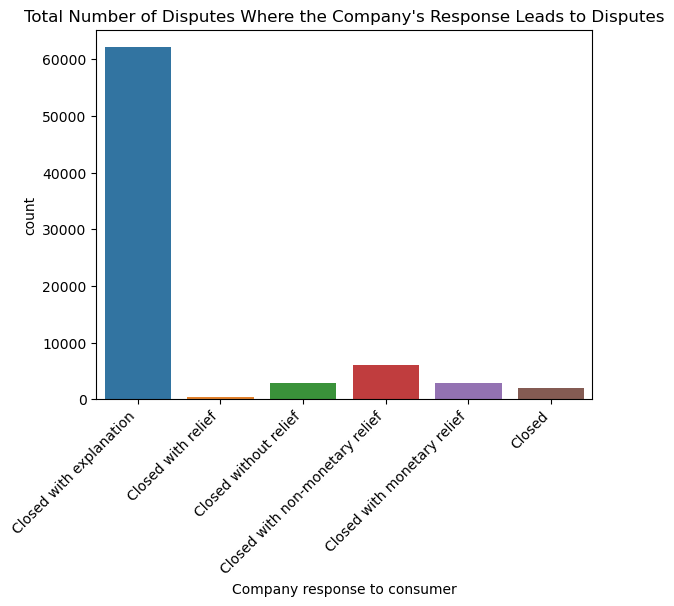

In [42]:
sns.countplot(x='Company response to consumer', data=df_train[df_train['Consumer disputed?']])
plt.title("Total Number of Disputes Where the Company's Response Leads to Disputes")
plt.xticks(rotation=45, ha='right')
plt.show()

#### 17. Plot bar graph ofthe total no of disputes. Whether there are Disputes Instead of Timely Response

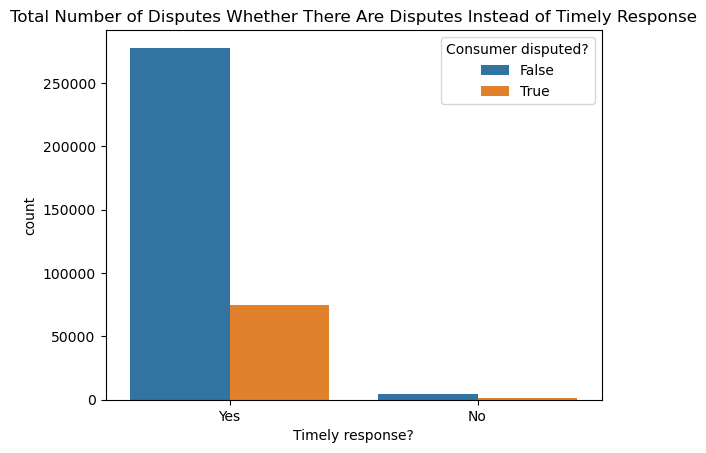

In [43]:
sns.countplot(x='Timely response?', hue='Consumer disputed?', data=df_train)
plt.title("Total Number of Disputes Whether There Are Disputes Instead of Timely Response")
plt.show()

#### 18. Plot bar graph of the total no of disputes over Year Wise Complaints

In [44]:
yearly_complaints = df_train['Year'].value_counts().sort_index()
yearly_complaints

2011      1435
2012     42828
2013     64527
2014     89608
2015    100448
2016     59964
Name: Year, dtype: int64

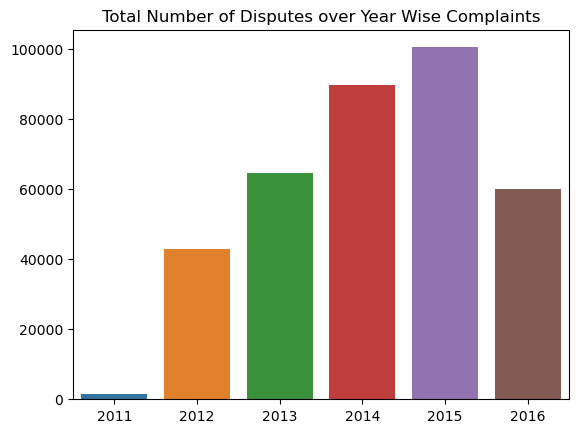

In [45]:
sns.barplot(x=yearly_complaints.index, y=yearly_complaints.values)
plt.title('Total Number of Disputes over Year Wise Complaints')
plt.show()

#### 19. Plot bar graph of the total no of disputes over Year Wise Disputes

In [46]:
yearly_disputes = disputed_cons['Year'].value_counts().sort_index()
yearly_disputes

2011      346
2012     9830
2013    13615
2014    17814
2015    20580
2016    13987
Name: Year, dtype: int64

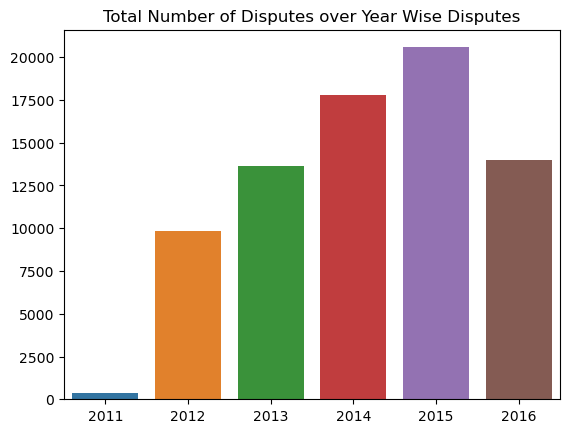

In [47]:
sns.barplot(x=yearly_disputes.index, y=yearly_disputes.values)
plt.title('Total Number of Disputes over Year Wise Disputes')
plt.show()

#### 20. Plot bar graph of Top Companies with Highest Complaints

In [48]:
top_companies = df_train['Company'].value_counts().head(10)
top_companies

Bank of America                           34903
Wells Fargo & Company                     26490
JPMorgan Chase & Co.                      21677
Equifax                                   21489
Experian                                  20075
TransUnion Intermediate Holdings, Inc.    16881
Citibank                                  16792
Ocwen                                     13110
Capital One                               10082
Nationstar Mortgage                        8414
Name: Company, dtype: int64

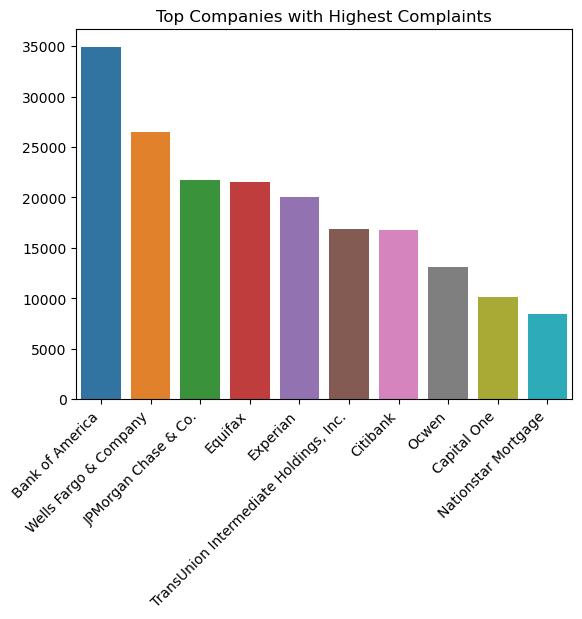

In [49]:
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top Companies with Highest Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 21. Converte all negative days held to zero (it is the time taken by the authority that can't be negative)

Note: Already done with this step above!!

#### 22. Drop Unnecessary Columns for the Model Building like: 'Company', 'State', 'Year_Received', 'Days_held'

In [50]:
df_train.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Day', 'Month',
       'Year', 'Days held', 'Week_Received', 'Consumer disputed?'],
      dtype='object')

In [51]:
for df in [df_train, df_test]:
    df.drop(['Company','State','Year','Days held'], axis=1, inplace=True)

In [52]:
df_train.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,14,10,434,False
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,26,4,458,True
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,20,12,529,False
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,3,3,414,False
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,30,1,471,True


#### 23. Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [53]:
label = LabelEncoder()

In [54]:
df_train['Consumer disputed?'] = label.fit_transform(df_train['Consumer disputed?'])
df_train.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Week_Received,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,14,10,434,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,26,4,458,1
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,20,12,529,0
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,3,3,414,0
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,30,1,471,1


#### 24. Create Dummy Variables for categorical features and concat with the original data framelike: 'Product,’'Submitted via,’'Company response to consumer,’'Timely response?

In [55]:
cols = [ 'Product','Submitted via','Company response to consumer','Timely response?']

In [56]:
train_encoded = pd.get_dummies(df_train, columns=cols)
train_encoded.head()

,Issue,Day,Month,Week_Received,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,Incorrect information on credit report,14,10,434,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,Deposits and withdrawals,26,4,458,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,Other,20,12,529,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,Disclosure verification of debt,3,3,414,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,Disclosure verification of debt,30,1,471,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [57]:
test_encoded = pd.get_dummies(df_test, columns=cols)
test_encoded.head()

,Issue,Day,Month,Week_Received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,Customer service / Customer relations,17,1,472,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Payment to acct not credited,22,6,398,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Credit line increase/decrease,4,9,440,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,Problems when you are unable to pay,17,5,403,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,Improper contact or sharing of info,7,7,396,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
train_encoded.columns

Index(['Issue', 'Day', 'Month', 'Week_Received', 'Consumer disputed?',
       'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Timely response?_No', 'Timely respons

#### 25. Scaling the Data Sets (note:discard dependent variable before doing standardization) and Make feature Selection with the help of PCA up to 80% of the information.

In [59]:
df_x = train_encoded.drop(['Consumer disputed?'], axis=1)

In [60]:
df_y = train_encoded['Consumer disputed?']

In [61]:
for df in [df_x, test_encoded]:
    df['Issue'] = label.fit_transform(df['Issue'])
    #df.head()

In [62]:
scaler = StandardScaler()

In [63]:
#Training data
train_scaled = scaler.fit_transform(df_x)

In [64]:
pca = PCA(n_components=0.8)

In [65]:
prin_train = pca.fit_transform(train_scaled)

In [66]:
pc_df_train = pd.DataFrame(data=prin_train, columns=[f'PC_{i+1}' for i in range(prin_train.shape[1])])
pc_df_train

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19
0,1.567753,-1.114924,0.408882,0.504799,0.744331,0.634674,0.629485,-0.623398,0.190544,-0.194170,0.210719,0.142838,0.122075,-0.704294,-0.194030,0.079559,-0.025205,0.140885,0.036783
1,0.436730,-0.210858,-0.090145,-1.579237,-0.027017,0.405860,-0.268135,-1.064055,1.524809,0.112196,-0.289690,0.506572,-0.440306,0.334664,0.347644,0.058064,-0.173284,-0.340277,-0.756075
2,-1.078182,0.307280,-2.587815,0.292573,1.112854,0.506067,-0.188913,3.058615,-1.213386,-0.566215,-0.800901,-0.192832,0.783873,-0.721595,0.695545,-0.106527,0.061424,-0.330004,1.266343
3,-0.189693,0.277873,0.713166,-1.423930,1.047643,-1.444757,-0.493496,-0.463007,-0.074184,1.105122,-0.726654,-0.385740,0.088450,0.037783,-0.707212,-0.239865,0.195296,1.214935,0.156224
4,1.600930,-0.107511,0.370345,-0.903418,-0.566171,-1.385671,-0.313686,0.277905,0.099182,0.617441,-1.222164,-0.014360,-0.606466,1.243180,0.614229,-0.097777,-0.205179,-0.387493,-0.850065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,1.144895,-0.739764,-2.262055,2.565493,1.027766,-0.429843,0.090998,-0.272135,0.853100,-0.148469,-0.573448,0.528658,0.030630,-0.310882,-0.070194,-0.031785,-0.087451,0.263680,0.145375
358806,-2.502658,0.381529,-1.010654,2.198545,0.718455,-1.178418,-1.007945,-0.648898,-0.027169,0.168214,-1.158606,0.138202,0.086445,-0.147281,-0.003076,-0.096221,-0.086498,0.160376,0.413284
358807,-0.305696,0.925987,-2.132379,1.040236,-1.722780,-0.401361,-1.198941,0.746461,-1.771782,1.029935,3.554795,0.293606,-1.353921,0.168791,-1.529712,0.819682,0.221297,-1.111124,-0.729583
358808,0.453151,0.619040,-2.182887,-0.717259,2.066198,-1.917537,-1.841779,2.836498,0.027968,-0.352976,-1.512831,-0.116748,0.279647,0.225054,0.903372,-0.245720,-0.164242,-0.164782,0.800470


In [67]:
#pc_df_train = pd.concat([pc_df_train, df_y], axis=1)
#pc_df_train.head()

In [68]:
#Testing data
test_scaled = scaler.fit_transform(test_encoded)

In [69]:
prin_test = pca.fit_transform(test_scaled)

In [70]:
pc_df_test = pd.DataFrame(data=prin_test, columns=[f'PC_{i+1}' for i in range(prin_test.shape[1])])
pc_df_test

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19
0,-0.045157,0.305391,-3.190593,-0.822482,-1.827489,2.105895,0.779981,-0.129489,-1.259412,0.043935,-0.430753,0.548987,-0.420983,0.893663,0.949048,0.211045,-0.847929,-0.469836,-0.682816
1,-0.064542,-0.471512,1.298217,-0.591105,1.311873,2.656310,-2.179444,3.797907,1.406393,2.563061,-0.110697,0.215560,0.453539,0.768979,-0.231866,-0.328959,0.849168,-1.109377,0.911191
2,0.912937,-0.339362,-0.403318,-1.135557,-1.108362,0.748975,1.542498,0.138471,-1.219040,0.137800,0.481913,-0.475091,-0.005227,-0.480569,-0.344804,0.258141,-0.860269,0.037518,0.856166
3,1.386505,-0.691552,-1.363536,2.379552,0.346550,1.910364,-2.377645,1.275027,1.233248,3.070243,0.075198,-0.197976,0.487299,0.699633,-0.122540,-0.167354,0.246242,-0.923971,0.946809
4,2.043411,-0.312708,0.517251,-0.973214,-0.176565,-0.861737,-0.542813,0.159184,-0.328901,0.415912,0.064478,-0.136200,0.051604,-0.168332,-0.070617,0.293773,-0.886083,0.107489,0.713386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,0.678841,-0.257821,-0.491068,-0.960078,-1.381085,0.405338,1.799635,0.404643,-0.520490,0.366411,-0.080834,-0.185101,-0.324973,0.416544,0.636811,0.220998,-0.778593,-0.157968,0.203961
119602,0.150531,0.022712,-0.748891,-1.289520,-1.596215,0.227106,1.968594,0.178708,-1.353752,0.092040,0.272979,-0.255303,0.262015,-0.665072,-0.850958,0.042483,-0.159777,0.049975,0.467291
119603,-4.437359,1.192578,-0.474193,2.275371,-1.648745,-1.694348,0.108109,0.317303,1.211957,-0.591877,-0.340073,1.301746,-0.222843,0.867578,0.222107,0.325106,-1.080417,-0.762848,0.955794
119604,1.440369,-1.057324,0.311821,0.656709,0.575086,0.478299,0.788403,-0.451141,0.637290,-0.233904,0.432451,-0.493788,-0.363496,-0.033028,0.029025,0.204334,-0.683238,0.315726,0.186341


#### 26. Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)

In [71]:
x = pc_df_train
x.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19
0,1.567753,-1.114924,0.408882,0.504799,0.744331,0.634674,0.629485,-0.623398,0.190544,-0.194170,0.210719,0.142838,0.122075,-0.704294,-0.194030,0.079559,-0.025205,0.140885,0.036783
1,0.436730,-0.210858,-0.090145,-1.579237,-0.027017,0.405860,-0.268135,-1.064055,1.524809,0.112196,-0.289690,0.506572,-0.440306,0.334664,0.347644,0.058064,-0.173284,-0.340277,-0.756075
2,-1.078182,0.307280,-2.587815,0.292573,1.112854,0.506067,-0.188913,3.058615,-1.213386,-0.566215,-0.800901,-0.192832,0.783873,-0.721595,0.695545,-0.106527,0.061424,-0.330004,1.266343
3,-0.189693,0.277873,0.713166,-1.423930,1.047643,-1.444757,-0.493496,-0.463007,-0.074184,1.105122,-0.726654,-0.385740,0.088450,0.037783,-0.707212,-0.239865,0.195296,1.214935,0.156224
4,1.600930,-0.107511,0.370345,-0.903418,-0.566171,-1.385671,-0.313686,0.277905,0.099182,0.617441,-1.222164,-0.014360,-0.606466,1.243180,0.614229,-0.097777,-0.205179,-0.387493,-0.850065


In [72]:
y = df_y
y.head()
#y.shape

0    0
1    1
2    0
3    0
4    1
Name: Consumer disputed?, dtype: int64

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

#### 27. Build given models and measurectheir test and validation accuracy:
  LogisticRegression
  
  DecisionTreeClassifier 
  
  RandomForestClassifier 
  
  AdaBoostClassifier
  
  GradientBoostingClassifier
  
  KNeighborsClassifier 
  
  XGBClassifier

In [74]:
models = [
    ('LogisticRegression',LogisticRegression()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('RandomForestClassifier',RandomForestClassifier()),
    ('AdaBoostClassifier',AdaBoostClassifier()),
    ('GradientBoostingClassifier',GradientBoostingClassifier()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('XGBClassifier',XGBClassifier())
]

In [75]:
for info, func in models:
    model = func
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{info}'s accuracy : {accuracy:.4f}")

LogisticRegression's accuracy : 0.7876
DecisionTreeClassifier's accuracy : 0.7435
RandomForestClassifier's accuracy : 0.7567
AdaBoostClassifier's accuracy : 0.7885
GradientBoostingClassifier's accuracy : 0.7898
KNeighborsClassifier's accuracy : 0.7582
XGBClassifier's accuracy : 0.7928


#### 28. Whoever gives the most accurate result uses it and predicts the outcomefor the test file and fills its dispute column so the business team can take some action accordingly.

In [76]:
xgb = XGBClassifier()
xgb.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred = model.predict(pc_df_test)
list(y_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [78]:
df_test['Consumer disputed?']=y_pred

In [79]:
df_test

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Week_Received,Consumer disputed?
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes,17,1,472,0
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes,22,6,398,0
2,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes,4,9,440,0
3,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes,17,5,403,0
4,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,7,7,396,0
...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Web,Closed with explanation,Yes,9,2,469,0
119602,Credit card,Balance transfer,Web,Closed with explanation,Yes,13,11,586,0
119603,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,15,5,612,0
119604,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,7,6,452,0


In [80]:
df_test['Consumer disputed?'].replace({0:'No',1:'Yes'}, inplace=True)

In [81]:
df_test.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Week_Received,Consumer disputed?
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes,17,1,472,No
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes,22,6,398,No
2,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes,4,9,440,No
3,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes,17,5,403,No
4,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,7,7,396,No
